## Indirekte Funktionen

Um eine indirekte Funktion, wie beispielsweise einen Kreis in Python zu plotten, schauen wir uns zunächst erneut die allgemeine Struktur einer indirekten Funktion an.

\begin{align*}
F(x,y) &=0
\end{align*}

Ganz allgemein können wir eine so definierte Funktion auch als dreidimensionale Funktion beschreiben, also einem Triple $(x,y,z)$, wobei $F: (x,y) \to z$.
\begin{align*}
z &= F(x,y)
\end{align*}
Wir fügen also eine weitere Dimension $z$ hizu.

Angenommen wir wollen also einen Kreis in der $(x,y)$-Ebene beschreiben, dann ergibt sich die implizite Funktion
\begin{align*}
0 = (x - x_{0})^{2}+ (y - y_{0})^{2} -r
\end{align*}


Diese implizte Funktion ist die Höhenlinie für $z=0$ eines Parapoloids im dreidimensionalen Raum
\begin{align*}
z = F(x,y) = (x - x_{0})^{2}+ (y - y_{0})^{2} -r = 0
\end{align*}

Um also einen Kreis (oder eine implizite Funktion) in Python zu plotten nutzen wir diese Verallgemeinerung. Wir fügen eine redundante dritte Dimension hinzu und verwenden dann einen Kontourplot (zeichnen also nur eine Höhenline aus der komplizierteren 3D Struktur). 

Um eine drei dimensionale Plot zu erstellen müssen wir uns zunächst ein Netz mit allen geordneten Paaren $(x,y)$ generieren. Das tun wir mit der numpy-Funktion $\texttt{meshgrid()}$. Für jedes dieser geoordneten Paare erzeugen wir dann einen Funktionswert.

Im Folgenden werden wir die implizite Funktion für einen Kreis um den Ursprung betrachten
\begin{align*}
x^{2}+ y^{2} -1 = 0
\end{align*}

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [31]:
# Spanne das Netz auf
x = np.linspace(-1.0, 1.0, 100)
y = np.linspace(-1.0, 1.0, 100)
X, Y = np.meshgrid(x,y)
# Ordne die Funktionswerte zu
F = X**2 + Y**2 -1

Um den Paraboliden zu zeichnen können wir einen sogennanten Surfaceplot verwenden.

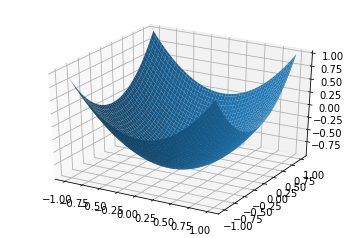

In [32]:
# Wir wollen eine 3D Figure zeichnen
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,F)

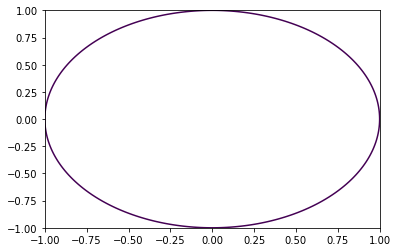

In [33]:
# Wir können nun die Kontourlinie für den Funktionswert 0 zeichnen
plt.contour(X,Y,F,[0])

### ZUSATZ: Spezialfall Kreis: Ohne Kontourplots

Der Vollständigkeit sei gesagt, dass sich das Zeichnen eines Kreises auch ohne Kontourplots bewerkställigen lässt. Dazu müssen die Kartesischen Koordinaten $(x,y)$ in Polarkoordinaten $(r,\phi)$ überführt werden. $r$ benennt dabei die Länge des durch kartesische Koordinaten beschriebenen Vektors und $\phi$ ist der Winkel dieses Vektors. Die folgenden Zusammenhänge finden Sie auch <a href="https://vitruv.uni-tuebingen.de/ilias3/goto_pr01_pg_9489_4881.html">im Video zu komplexen Zahlen</a>.

\begin{align*}
    r &= \sqrt{x^{2} + y^{2}}\\
    \phi &= tan^{-1}(\frac{y}{x})\\
    x &= r \, \cos(\phi)\\
    y &= r  \, \sin(\phi)
\end{align*}

Wir können dazu zwei Funktionen schreiben:

In [37]:
def cart2pol(x, y):
    # compute r
    r = np.sqrt(x**2 + y**2)
    # compute phi
    phi = np.arctan2(y, x)
    return(r, phi)

def pol2cart(r, phi):
    # compute x
    x = r * np.cos(phi)
    # compute y
    y = r * np.sin(phi)
    return(x, y)

Da in Polarkoordinaten sich ein Einheitskreis in Polarkoordinaten durch den Zusammenhang $r=1$ beschreiben lässt, können wir für jeden Winkel $\phi$ den Betrag 1 festsetzen. Alle geoordneten Paare $(\phi,1)$ können wir dann in kartesische Koordinaten umwandeln und plotten.

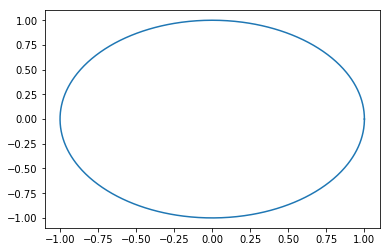

In [38]:
# Der Winkel \phi muss variabel gehalten werden
phi = np.linspace(0, 2*np.pi, 1000)
r = 1

# Umwandeln aller geordneten Paare in kartesische Koordinaten
x, y = pol2cart(r, phi)

plt.plot(x, y) 

## Task 1

Die <a href=https://de.wikipedia.org/wiki/Cobb-Douglas-Funktion>Copp-Douglas Produktionsfunktion</a> ist eine in den Wirtschaftswissenschaften oft verwendete Produktionsfunktion. So wird der Output $Y$ oft als Funktion der eingesetzten Arbeit $L$ und des aufgewendeten Kapitals $L$ beschrieben. Weiterhin ist ein Technologieparameter $A$ und die Faktorelastiztität (hier des Kapitals) durch den Parameter $\alpha$ festgelegt.

\begin{align*}
Y = A\;K^\alpha L^{1-\alpha}
\end{align*}

Nehmen wir an, dass $\alpha = 0.2$ und $A = 1$ seien. 

1. Erstellen Sie einen 3D Graphen der die Produktionsfunktion abträgt.

2. Erstellen Sie einen weiteren Graphen, der die sogenannten Isoquanten, d.h. die Höhenlinien dieser Produktionsfunktion für $Y=100,200,300$ darstellt.

In [70]:
# todo 3D Plot


In [71]:
# todo Kontourplot

## Task 2

In der Mikroökonomie wird oft eine <a href="https://de.wikipedia.org/wiki/Nutzenfunktion_(Mikro%C3%B6konomie)">Nutzenfunktion</a> für einen representativen Konsumer angenommen. Angenommen der Nutzen eines solchen representativen Konsumers hängt von zwei Faktoren ab: dem Anteil der täglichen Zeit, die dem Konsumer zur Verfügung  steht, $1-l$ und der konsumierten Gütermenge, $c$. Weiterhin sei angenommen, dass die Präferenzstruktur des repräsentativen Konsumers folgenden funktionalen Zusammenhang nahe legt:
\begin{align*}
    U(1-l,c) = \theta\sqrt{c} + \phi \log(1-l)
\end{align*}
wobei $0\leq l < 1$, $0\leq c < 1000$, $\phi = 1.2$ und $\theta=0.2$.

1. Erstellen Sie einen 3D Graphen der die Nutzenfunktion abträgt.

2. Erstellen Sie einen weiteren Graphen, der die sogenannten Indifferenzkurven für $U=0,2,4$, also die Kombinationen von $l$ und $c$, für die der Konsumer das gleiche Nutzenniveau $U$ erreicht. 

In [69]:
# todo 3D Plot

In [ ]:
# todo Kontourplot